In [1]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# blocks in Mierendorff but no relevant buildings
irrelevant = [ '019017', '019708', '019609']

<Axes: >

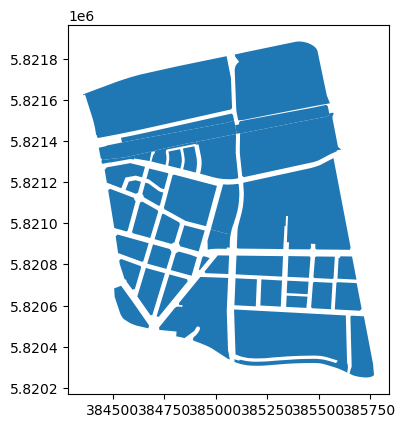

In [3]:
shape_data = gpd.read_file(r'C:\Users\felix\Programmieren\tecdm\data\berlin\00_block_shape.shp')
shape_data.plot()

In [4]:


shape_data['blknr'] = shape_data['blknr'].astype('int64')


In [5]:
energy_data = pd.read_excel(r'C:\Users\felix\Programmieren\tecdm\data\berlin\dh_berlin.xls')    
energy_data["blknr"] = energy_data["Blocknummer"]
energy_data

,Blocknummer,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh],blknr
0,1001,-,-,-,1001
1,1002,-,-,-,1002
2,1007,2568.032,2786.803,2684.242,1007
3,1010,-,-,-,1010
4,1012,1305.403,1432.731,1444.354,1012
...,...,...,...,...,...
16385,195634,-,-,-,195634
16386,195635,-,-,-,195635
16387,195901,-,-,-,195901
16388,195902,-,-,-,195902


In [6]:
district_data = shape_data.merge(energy_data, on="blknr")


In [7]:
# Create a new column in 'merged_data' with categorical data
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500]
district_data['category'] = pd.cut(district_data['Fernwärmeverbrauch 2020 [MWh]'].replace('-', 0), bins, include_lowest=True)
district_data

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh],category
0,19017,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,135480.859375,1999/07/12 00:00:00.000,"POLYGON ((385108.987 5821500.417, 385100.973 5...",19017,-,-,-,"(-0.001, 500.0]"
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",19033,-,-,-,"(-0.001, 500.0]"
2,19609,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,177086.625000,1998/10/08 00:00:00.000,"POLYGON ((384425.042 5821417.137, 384423.583 5...",19609,-,-,-,"(-0.001, 500.0]"
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",19692,2896.681,3684.376,2229.792,"(2000.0, 2500.0]"
4,19708,04,Charlottenburg-Wilmersdorf,04300518,Block,10-99 Einwohner,16879.630859,2006/03/10 00:00:00.000,"POLYGON ((384539.409 5821415.761, 384588.890 5...",19708,-,-,-,"(-0.001, 500.0]"
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",19742,-,-,-,"(-0.001, 500.0]"
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",19759,-,-,-,"(-0.001, 500.0]"
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",19760,-,-,-,"(-0.001, 500.0]"
8,19901,04,Charlottenburg-Wilmersdorf,04300518,Bahnblock,unbewohnt,25851.810547,1994/11/24 00:00:00.000,"POLYGON ((385545.981 5821564.498, 385546.964 5...",19901,-,-,-,"(-0.001, 500.0]"
9,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",20020,-,-,-,"(-0.001, 500.0]"


Text(0.5, 1.0, 'Fernwärmeverbrauch 2022 [MWh]')

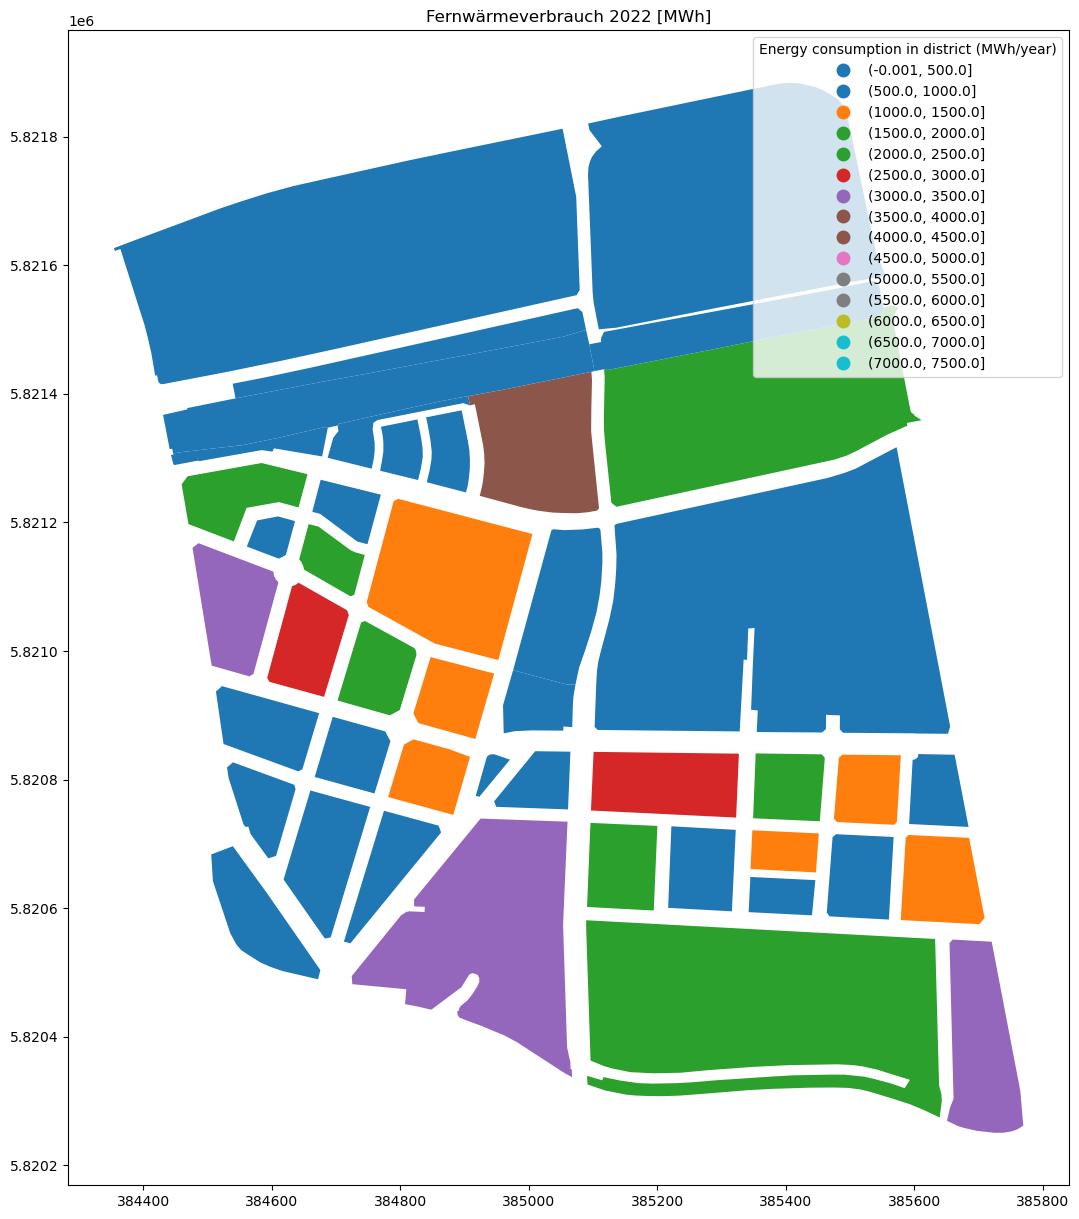

In [8]:
# Plotting the map with a colormap
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
district_data.plot(column='category', ax=ax, legend=True,
                    legend_kwds={'title': "Energy consumption in district (MWh/year)"})
plt.title('Fernwärmeverbrauch 2022 [MWh]')

In [9]:
# Add function, that plots based on data availabilty 
# If data is there, color differently 
# for example one year, to two yers , to three years 



In [10]:
columns_to_check = [
        "Fernwärmeverbrauch 2022 [MWh]",
        "Fernwärmeverbrauch 2021 [MWh]",
        "Fernwärmeverbrauch 2020 [MWh]"
    ]

for column in columns_to_check:
        district_data[column] = pd.to_numeric(district_data[column], errors='coerce')

district_data["valid_entries"] = district_data[columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
district_data

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Fernwärmeverbrauch 2022 [MWh],Fernwärmeverbrauch 2021 [MWh],Fernwärmeverbrauch 2020 [MWh],category,valid_entries
0,19017,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,135480.859375,1999/07/12 00:00:00.000,"POLYGON ((385108.987 5821500.417, 385100.973 5...",19017,NaN,NaN,NaN,"(-0.001, 500.0]",0
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",19033,NaN,NaN,NaN,"(-0.001, 500.0]",0
2,19609,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,177086.625000,1998/10/08 00:00:00.000,"POLYGON ((384425.042 5821417.137, 384423.583 5...",19609,NaN,NaN,NaN,"(-0.001, 500.0]",0
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",19692,2896.681,3684.376,2229.792,"(2000.0, 2500.0]",3
4,19708,04,Charlottenburg-Wilmersdorf,04300518,Block,10-99 Einwohner,16879.630859,2006/03/10 00:00:00.000,"POLYGON ((384539.409 5821415.761, 384588.890 5...",19708,NaN,NaN,NaN,"(-0.001, 500.0]",0
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",19742,NaN,NaN,NaN,"(-0.001, 500.0]",0
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",19759,NaN,NaN,NaN,"(-0.001, 500.0]",0
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",19760,NaN,NaN,NaN,"(-0.001, 500.0]",0
8,19901,04,Charlottenburg-Wilmersdorf,04300518,Bahnblock,unbewohnt,25851.810547,1994/11/24 00:00:00.000,"POLYGON ((385545.981 5821564.498, 385546.964 5...",19901,NaN,NaN,NaN,"(-0.001, 500.0]",0
9,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",20020,NaN,NaN,NaN,"(-0.001, 500.0]",0


Text(0.5, 1.0, 'Number of valid Data Reportings for district heating')

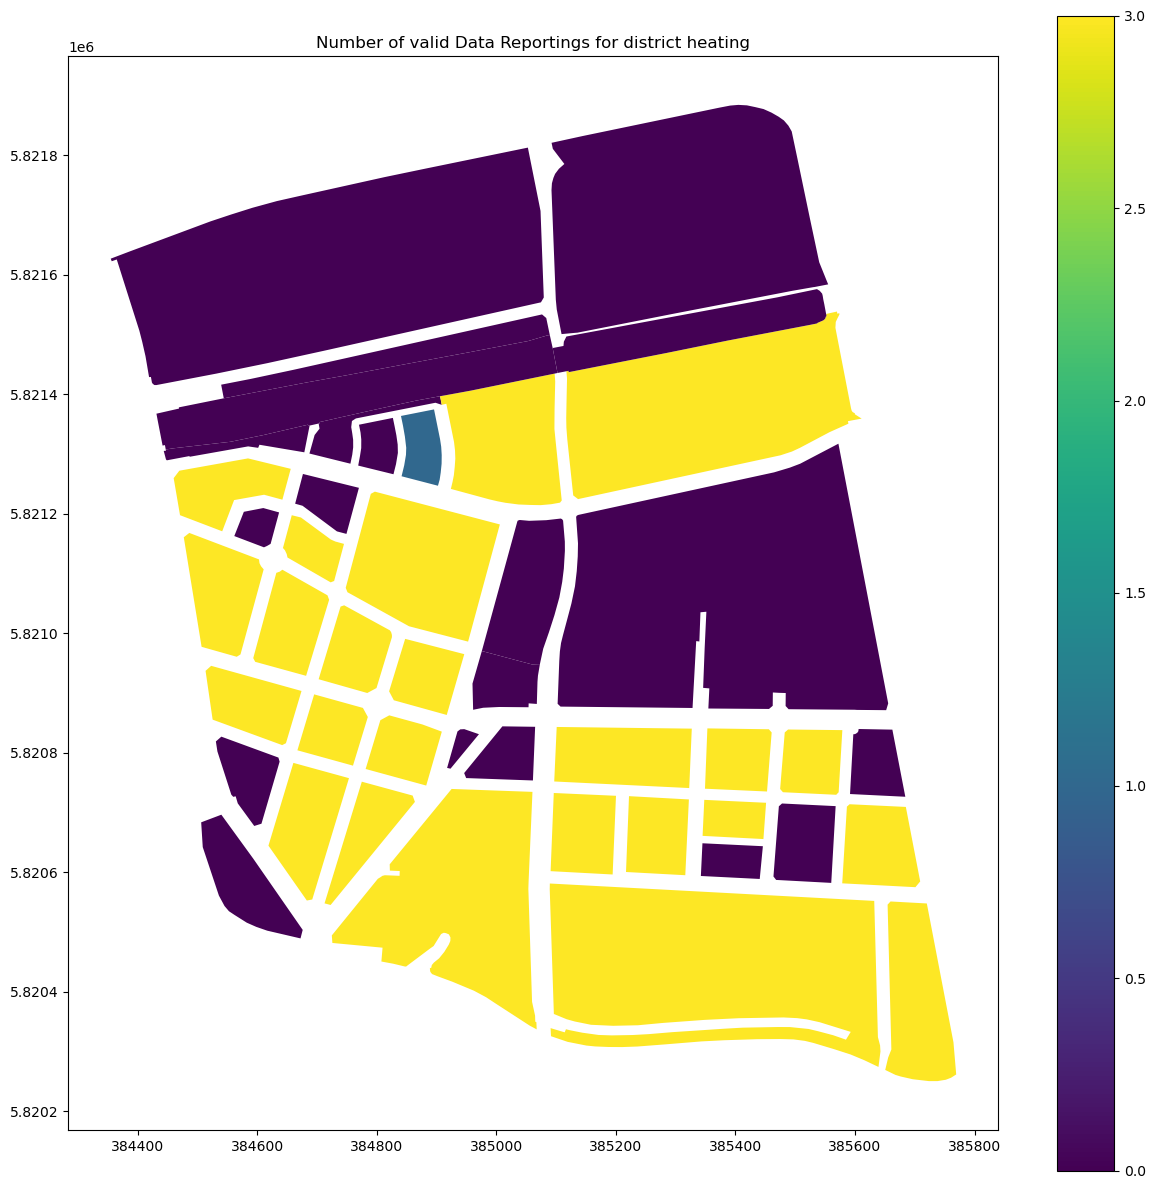

In [11]:

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
district_data.plot(column='valid_entries', ax=ax, legend=True,)
plt.title('Number of valid Data Reportings for district heating')

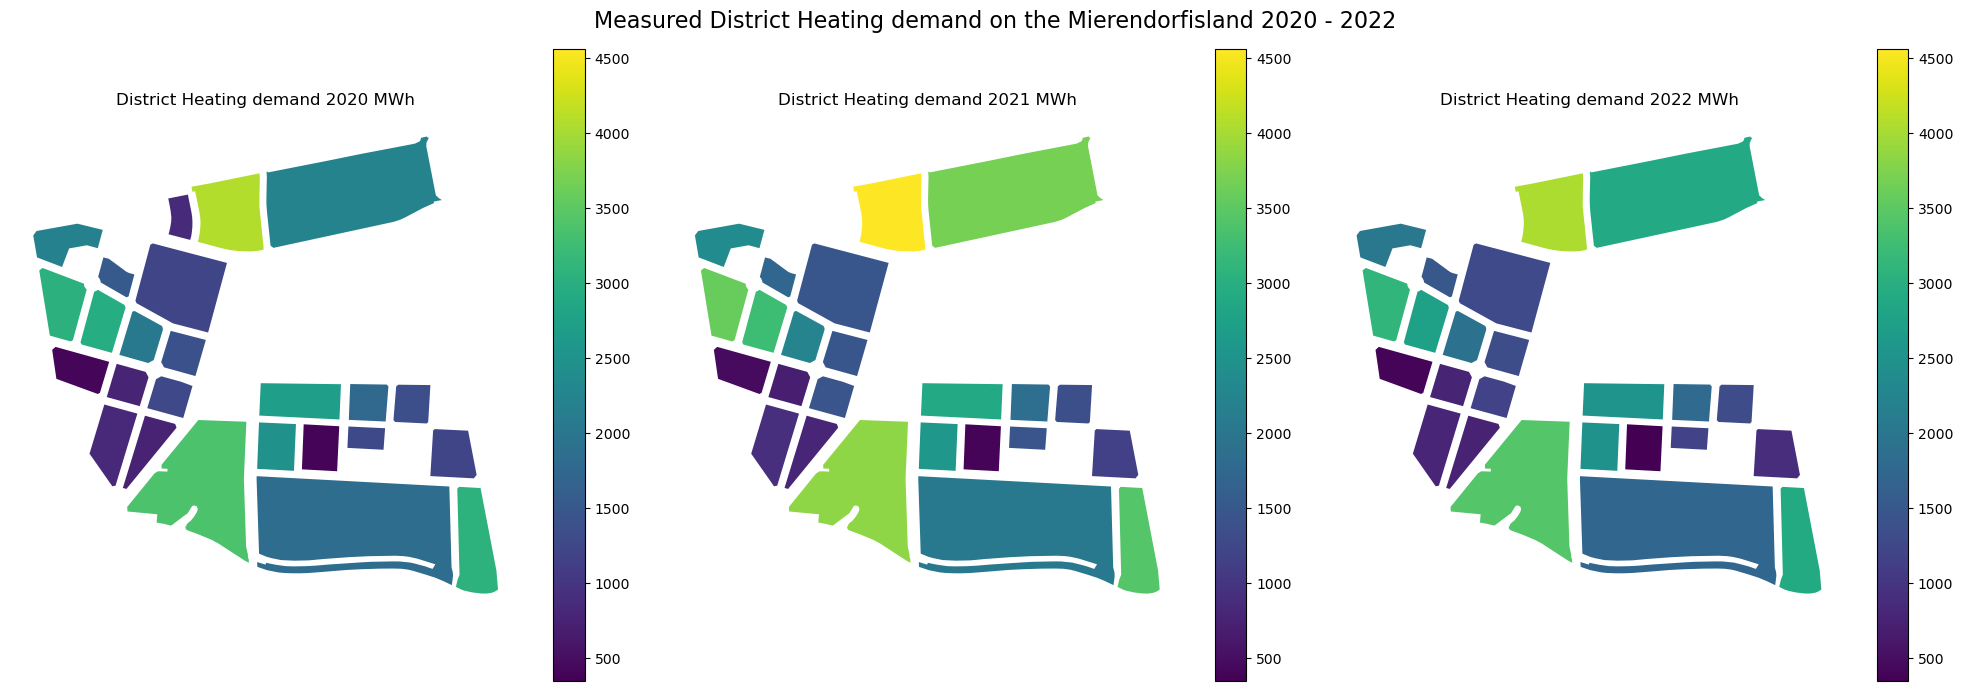

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import pandas as pd

geo_data = district_data

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns

# Define a normalization for the color mapping
norm = Normalize(vmin=geo_data[['Fernwärmeverbrauch 2020 [MWh]', 'Fernwärmeverbrauch 2021 [MWh]', 'Fernwärmeverbrauch 2022 [MWh]']].min().min(),
                 vmax=geo_data[['Fernwärmeverbrauch 2020 [MWh]', 'Fernwärmeverbrauch 2021 [MWh]', 'Fernwärmeverbrauch 2022 [MWh]']].max().max())

# Create the color map
cmap = plt.cm.viridis

# Plotting Stromverbrauch 2020
geo_data.plot(column='Fernwärmeverbrauch 2020 [MWh]', ax=axs[0], legend=True, cmap=cmap, norm=norm)
axs[0].set_title('District Heating demand 2020 MWh')

# Plotting Stromverbrauch 2021
geo_data.plot(column='Fernwärmeverbrauch 2021 [MWh]', ax=axs[1], legend=True, cmap=cmap, norm=norm)
axs[1].set_title('District Heating demand 2021 MWh')

# Plotting Stromverbrauch 2022
geo_data.plot(column='Fernwärmeverbrauch 2022 [MWh]', ax=axs[2], legend=True, cmap=cmap, norm=norm)
axs[2].set_title('District Heating demand 2022 MWh')

# Remove the axis for a cleaner look and adjust for space between plots
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(wspace=0.3)


# Add a common title
fig.suptitle('Measured District Heating demand on the Mierendorfisland 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
shape_data = gpd.read_file(r'C:\Users\felix\Programmieren\tecdm\data\berlin\00_block_shape.shp')


shape_data['blknr'] = shape_data['blknr'].astype('int64') 
elec_data = pd.read_excel(r'C:\Users\felix\Programmieren\tecdm\data\berlin\Elec_Berlin_2020_2022.xls')    
elec_data["blknr"] = energy_data["Blocknummer"]
elec_data_shapes = shape_data.merge(elec_data, on="blknr") 
elec_data_shapes 


,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Stromverbrauch 2022 [MWh],Hinweis 2022,Stromverbrauch 2021 [MWh],Hinweis 2021,Stromverbrauch 2020 [MWh],Hinweis 2020
0,19017,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,135480.859375,1999/07/12 00:00:00.000,"POLYGON ((385108.987 5821500.417, 385100.973 5...",157098,63.726,-,71.677,-,81.289,-
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",125698,81.529,-,50.948,-,82.512,-
2,19609,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,177086.625000,1998/10/08 00:00:00.000,"POLYGON ((384425.042 5821417.137, 384423.583 5...",145108,227.301,-,258.694,-,229.705,-
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",139172,122.78,-,121.231,-,110.969,-
4,19708,04,Charlottenburg-Wilmersdorf,04300518,Block,10-99 Einwohner,16879.630859,2006/03/10 00:00:00.000,"POLYGON ((384539.409 5821415.761, 384588.890 5...",108526,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",114014,652.2,-,648.021,-,666.821,-
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",70642,1551.351,-,1493.157,-,1601.751,-
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",116060,326.14,-,332.743,-,345.117,-
8,19901,04,Charlottenburg-Wilmersdorf,04300518,Bahnblock,unbewohnt,25851.810547,1994/11/24 00:00:00.000,"POLYGON ((385545.981 5821564.498, 385546.964 5...",37656,34.617,-,43.933,-,37.071,-
9,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",82607,586.568,-,613.663,-,594.698,-


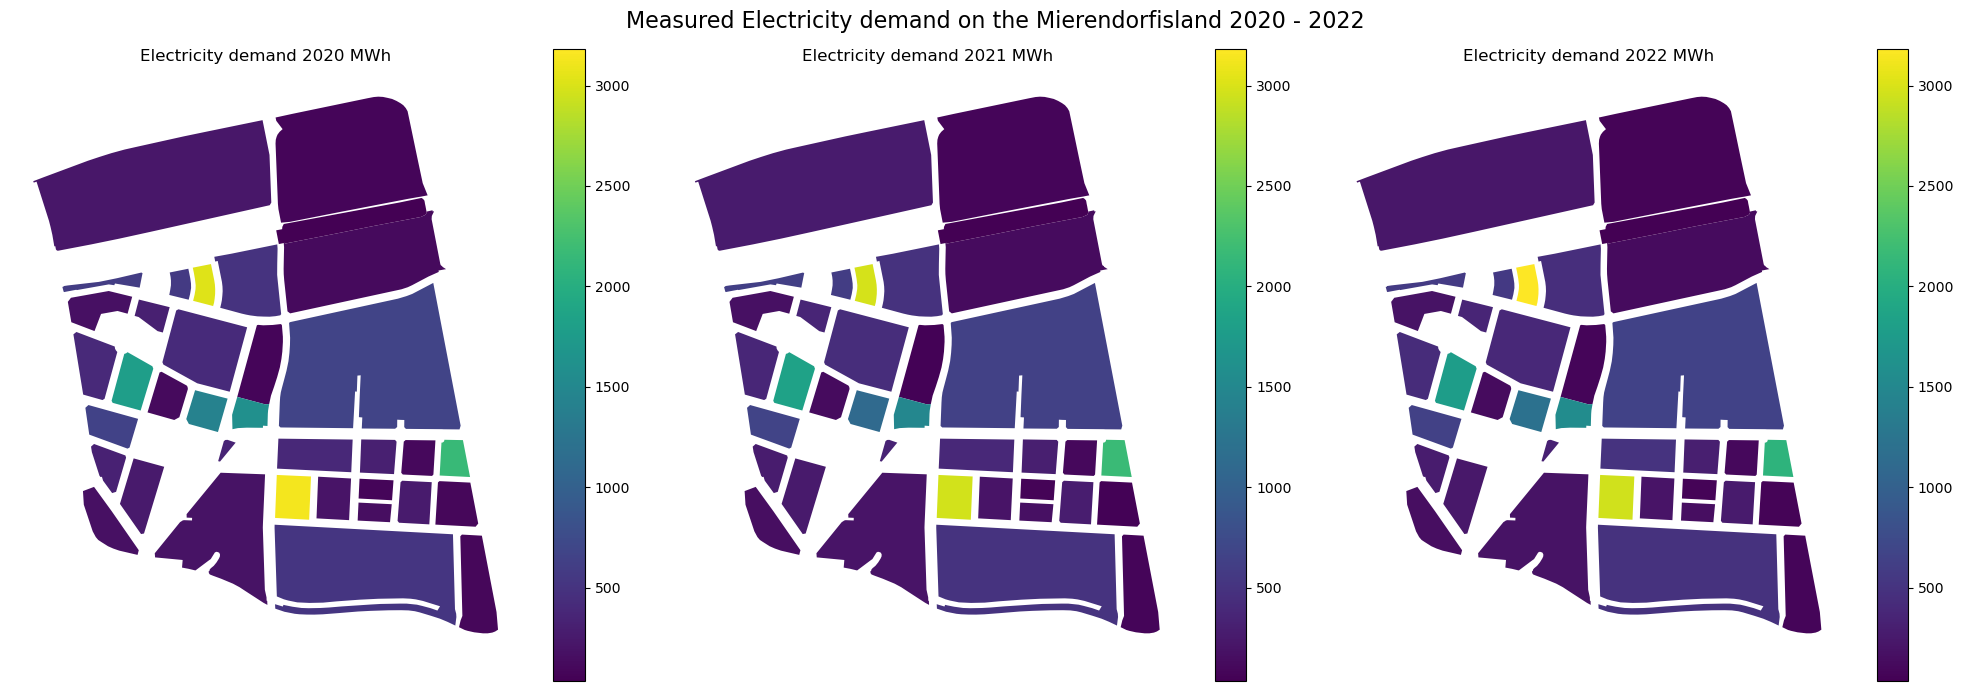

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import pandas as pd

geo_data = elec_data_shapes

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns

# Define a normalization for the color mapping
norm = Normalize(vmin=geo_data[['Stromverbrauch 2020 [MWh]', 'Stromverbrauch 2021 [MWh]', 'Stromverbrauch 2022 [MWh]']].min().min(),
                 vmax=geo_data[['Stromverbrauch 2020 [MWh]', 'Stromverbrauch 2021 [MWh]', 'Stromverbrauch 2022 [MWh]']].max().max())

# Create the color map
cmap = plt.cm.viridis

# Plotting Stromverbrauch 2020
geo_data.plot(column='Stromverbrauch 2020 [MWh]', ax=axs[0], legend=True, cmap=cmap, norm=norm)
axs[0].set_title('Electricity demand 2020 MWh')

# Plotting Stromverbrauch 2021
geo_data.plot(column='Stromverbrauch 2021 [MWh]', ax=axs[1], legend=True, cmap=cmap, norm=norm)
axs[1].set_title('Electricity demand 2021 MWh')

# Plotting Stromverbrauch 2022
geo_data.plot(column='Stromverbrauch 2022 [MWh]', ax=axs[2], legend=True, cmap=cmap, norm=norm)
axs[2].set_title('Electricity demand 2022 MWh')

# Remove the axis for a cleaner look and adjust for space between plots
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(wspace=0.3)


# Add a common title
fig.suptitle('Measured Electricity demand on the Mierendorfisland 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Stromverbrauch 2020 [MWh]')

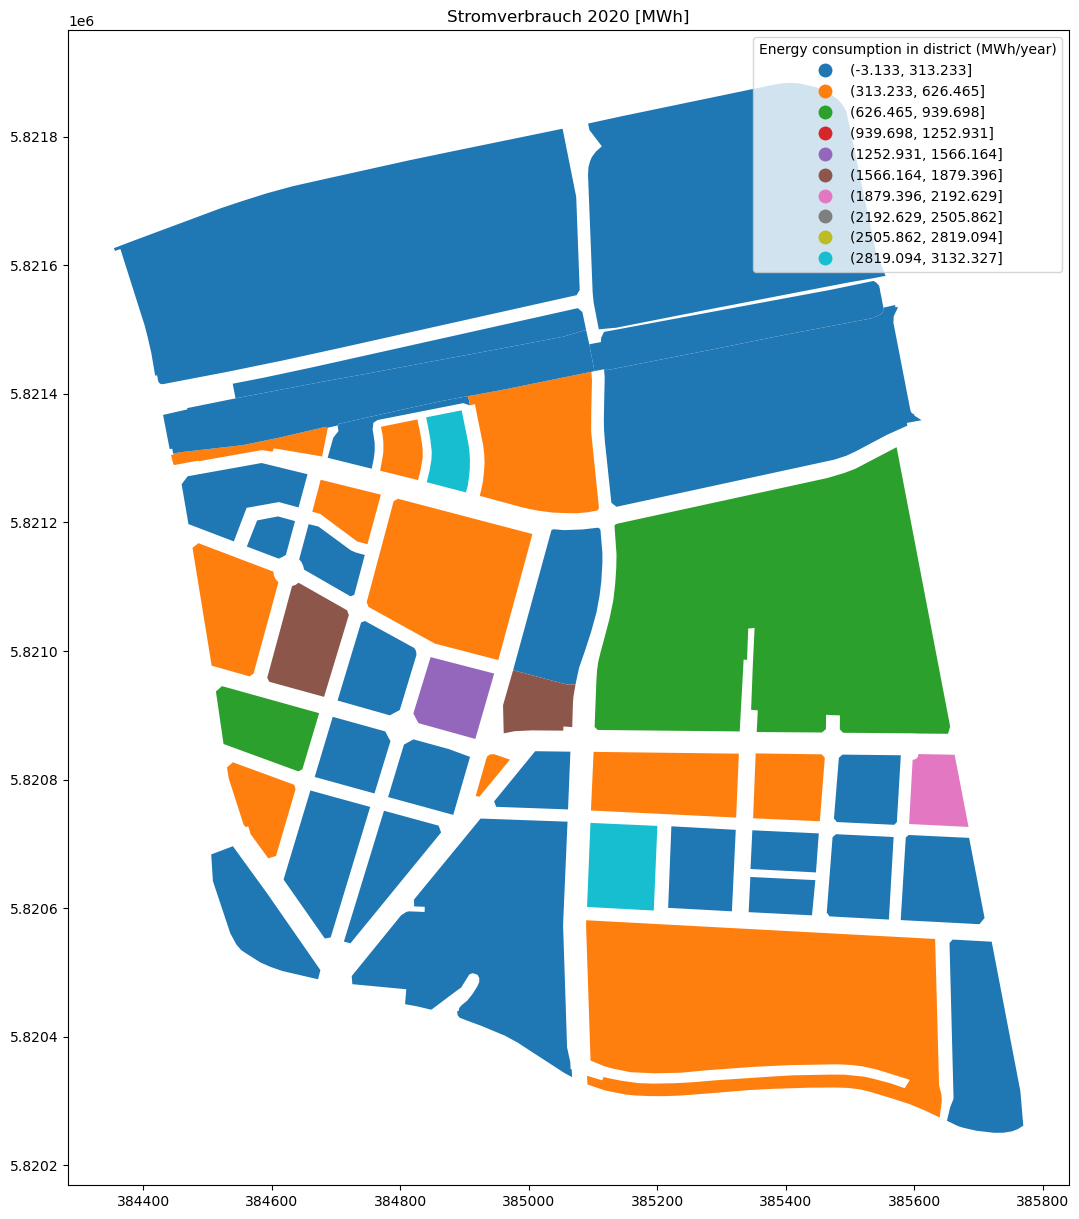

In [13]:
# Create a new column in 'merged_data' with categorical data
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500]
elec_data_shapes['category'] = pd.cut(elec_data_shapes['Stromverbrauch 2020 [MWh]'].replace('-', 0), bins=10, include_lowest=True)
# Plotting the map with a colormap
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
elec_data_shapes.plot(column='category', ax=ax, legend=True,
                    legend_kwds={'title': "Energy consumption in district (MWh/year)"})
plt.title('Stromverbrauch 2020 [MWh]')

In [14]:
elec_columns_to_check = [
        "Stromverbrauch 2022 [MWh]",
        "Stromverbrauch 2021 [MWh]",
        "Stromverbrauch 2020 [MWh]"
    ]

for column in elec_columns_to_check:
        elec_data_shapes[column] = pd.to_numeric(elec_data_shapes[column], errors='coerce')

elec_data_shapes["valid_entries"] = elec_data_shapes[elec_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
elec_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Stromverbrauch 2022 [MWh],Hinweis 2022,Stromverbrauch 2021 [MWh],Hinweis 2021,Stromverbrauch 2020 [MWh],Hinweis 2020,category,valid_entries
0,19017,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,135480.859375,1999/07/12 00:00:00.000,"POLYGON ((385108.987 5821500.417, 385100.973 5...",157098,63.726,-,71.677,-,81.289,-,"(-3.133, 313.233]",3
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",125698,81.529,-,50.948,-,82.512,-,"(-3.133, 313.233]",3
2,19609,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,177086.625000,1998/10/08 00:00:00.000,"POLYGON ((384425.042 5821417.137, 384423.583 5...",145108,227.301,-,258.694,-,229.705,-,"(-3.133, 313.233]",3
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",139172,122.780,-,121.231,-,110.969,-,"(-3.133, 313.233]",3
4,19708,04,Charlottenburg-Wilmersdorf,04300518,Block,10-99 Einwohner,16879.630859,2006/03/10 00:00:00.000,"POLYGON ((384539.409 5821415.761, 384588.890 5...",108526,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,"(-3.133, 313.233]",0
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",114014,652.200,-,648.021,-,666.821,-,"(626.465, 939.698]",3
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",70642,1551.351,-,1493.157,-,1601.751,-,"(1566.164, 1879.396]",3
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",116060,326.140,-,332.743,-,345.117,-,"(313.233, 626.465]",3
8,19901,04,Charlottenburg-Wilmersdorf,04300518,Bahnblock,unbewohnt,25851.810547,1994/11/24 00:00:00.000,"POLYGON ((385545.981 5821564.498, 385546.964 5...",37656,34.617,-,43.933,-,37.071,-,"(-3.133, 313.233]",3
9,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",82607,586.568,-,613.663,-,594.698,-,"(313.233, 626.465]",3


Text(0.5, 1.0, 'Number of valid Data Reportings for Electricity')

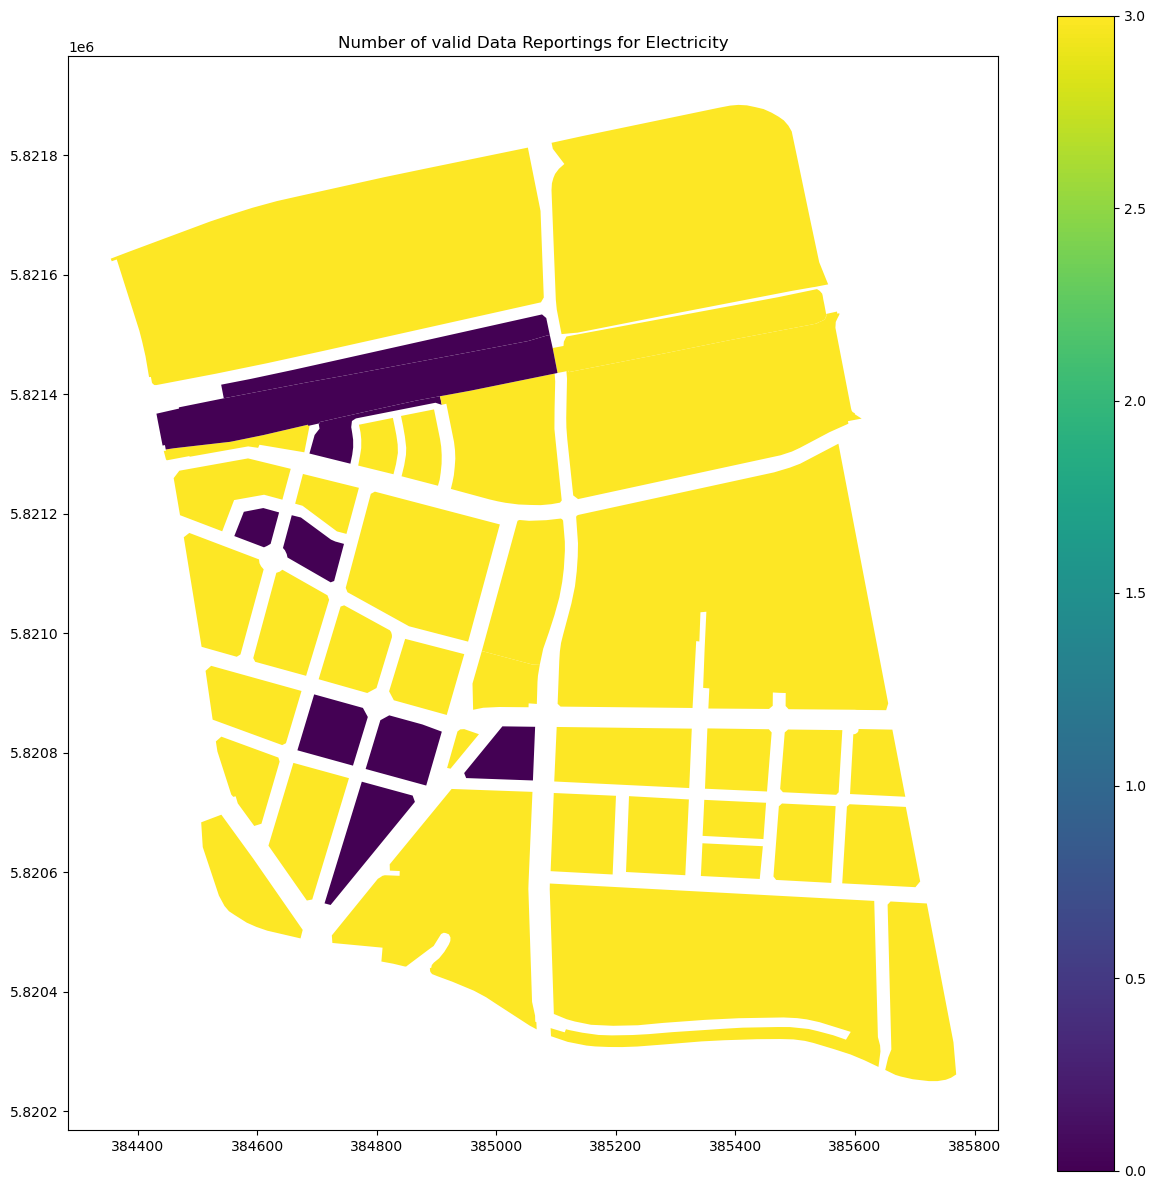

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
elec_data_shapes.plot(column='valid_entries', ax=ax, legend=True,)
plt.title('Number of valid Data Reportings for Electricity')

In [27]:
shape_data = gpd.read_file(r'C:\Users\felix\Programmieren\tecdm\data\berlin\00_block_shape.shp')


shape_data['blknr'] = shape_data['blknr'].astype('int64') 
gas_data = pd.read_excel(r'C:\Users\felix\Programmieren\tecdm\data\berlin\Gas_Berlin_2020_2022.xls')    
gas_data["blknr"] = energy_data["Blocknummer"]
gas_data_shapes = shape_data.merge(gas_data, on="blknr") 
gas_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Gasverbrauch 2022 [MWh],Hinweis 2022,Gasverbrauch 2021 [MWh],Hinweis 2021,Gasverbrauch 2020 [MWh],Hinweis 2020
0,19017,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,135480.859375,1999/07/12 00:00:00.000,"POLYGON ((385108.987 5821500.417, 385100.973 5...",157098,226.952,-,304.449,-,273.362,-
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",125698,238.923,-,286.432,-,251.819,-
2,19609,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,177086.625000,1998/10/08 00:00:00.000,"POLYGON ((384425.042 5821417.137, 384423.583 5...",145108,901.212,-,1155.593,-,1062.782,-
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",143087,134.926,-,155.951,-,174.133,-
4,19708,04,Charlottenburg-Wilmersdorf,04300518,Block,10-99 Einwohner,16879.630859,2006/03/10 00:00:00.000,"POLYGON ((384539.409 5821415.761, 384588.890 5...",131025,7834.784,-,9227.97,-,8298.739,-
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",70642,2956.555,-,2804.079,-,2323.898,-
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",116060,43.6,-,55.139,-,47.45,-
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",147067,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
8,19901,04,Charlottenburg-Wilmersdorf,04300518,Bahnblock,unbewohnt,25851.810547,1994/11/24 00:00:00.000,"POLYGON ((385545.981 5821564.498, 385546.964 5...",25510,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar
9,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",9123,-,Keine Angabe zum Verbrauch verfügbar,-,Keine Angabe zum Verbrauch verfügbar,-,Der Verbrauch wird aus Datenschutzgründen nich...


In [30]:
gas_columns_to_check = [
        "Gasverbrauch 2022 [MWh]",
        "Gasverbrauch 2021 [MWh]",
        "Gasverbrauch 2020 [MWh]"
    ]

for column in gas_columns_to_check:
        gas_data_shapes[column] = pd.to_numeric(gas_data_shapes[column], errors='coerce')

gas_data_shapes["valid_entries"] = gas_data_shapes[gas_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
gas_data_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,Blocknummer,Gasverbrauch 2022 [MWh],Hinweis 2022,Gasverbrauch 2021 [MWh],Hinweis 2021,Gasverbrauch 2020 [MWh],Hinweis 2020,valid_entries
0,19017,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,135480.859375,1999/07/12 00:00:00.000,"POLYGON ((385108.987 5821500.417, 385100.973 5...",157098,226.952,-,304.449,-,273.362,-,3
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",125698,238.923,-,286.432,-,251.819,-,3
2,19609,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,177086.625000,1998/10/08 00:00:00.000,"POLYGON ((384425.042 5821417.137, 384423.583 5...",145108,901.212,-,1155.593,-,1062.782,-,3
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",143087,134.926,-,155.951,-,174.133,-,3
4,19708,04,Charlottenburg-Wilmersdorf,04300518,Block,10-99 Einwohner,16879.630859,2006/03/10 00:00:00.000,"POLYGON ((384539.409 5821415.761, 384588.890 5...",131025,7834.784,-,9227.970,-,8298.739,-,3
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",70642,2956.555,-,2804.079,-,2323.898,-,3
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",116060,43.600,-,55.139,-,47.450,-,3
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",147067,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,0
8,19901,04,Charlottenburg-Wilmersdorf,04300518,Bahnblock,unbewohnt,25851.810547,1994/11/24 00:00:00.000,"POLYGON ((385545.981 5821564.498, 385546.964 5...",25510,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,0
9,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",9123,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Keine Angabe zum Verbrauch verfügbar,NaN,Der Verbrauch wird aus Datenschutzgründen nich...,0


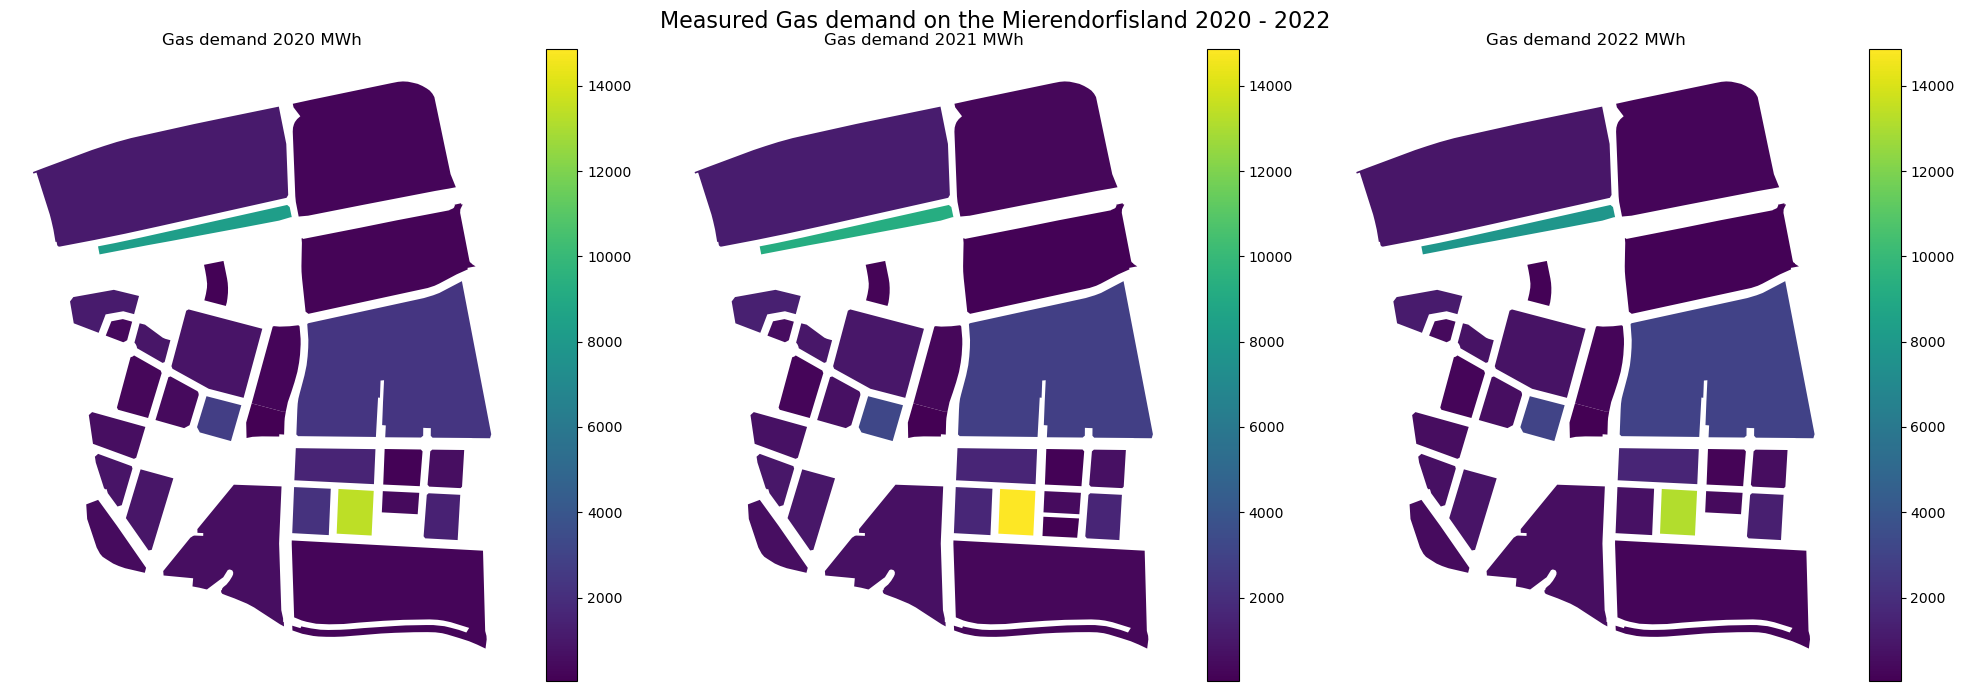

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import pandas as pd

geo_data = gas_data_shapes

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns

# Define a normalization for the color mapping
norm = Normalize(vmin=geo_data[['Gasverbrauch 2020 [MWh]', 'Gasverbrauch 2021 [MWh]', 'Gasverbrauch 2022 [MWh]']].min().min(),
                 vmax=geo_data[['Gasverbrauch 2020 [MWh]', 'Gasverbrauch 2021 [MWh]', 'Gasverbrauch 2022 [MWh]']].max().max())

# Create the color map
cmap = plt.cm.viridis

# Plotting Stromverbrauch 2020
geo_data.plot(column='Gasverbrauch 2020 [MWh]', ax=axs[0], legend=True, cmap=cmap, norm=norm)
axs[0].set_title('Gas demand 2020 MWh')

# Plotting Stromverbrauch 2021
geo_data.plot(column='Gasverbrauch 2021 [MWh]', ax=axs[1], legend=True, cmap=cmap, norm=norm)
axs[1].set_title('Gas demand 2021 MWh')

# Plotting Stromverbrauch 2022
geo_data.plot(column='Gasverbrauch 2022 [MWh]', ax=axs[2], legend=True, cmap=cmap, norm=norm)
axs[2].set_title('Gas demand 2022 MWh')

# Remove the axis for a cleaner look and adjust for space between plots
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(wspace=0.3)


# Add a common title
fig.suptitle('Measured Gas demand on the Mierendorfisland 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Number of valid Data Reportings for Gas')

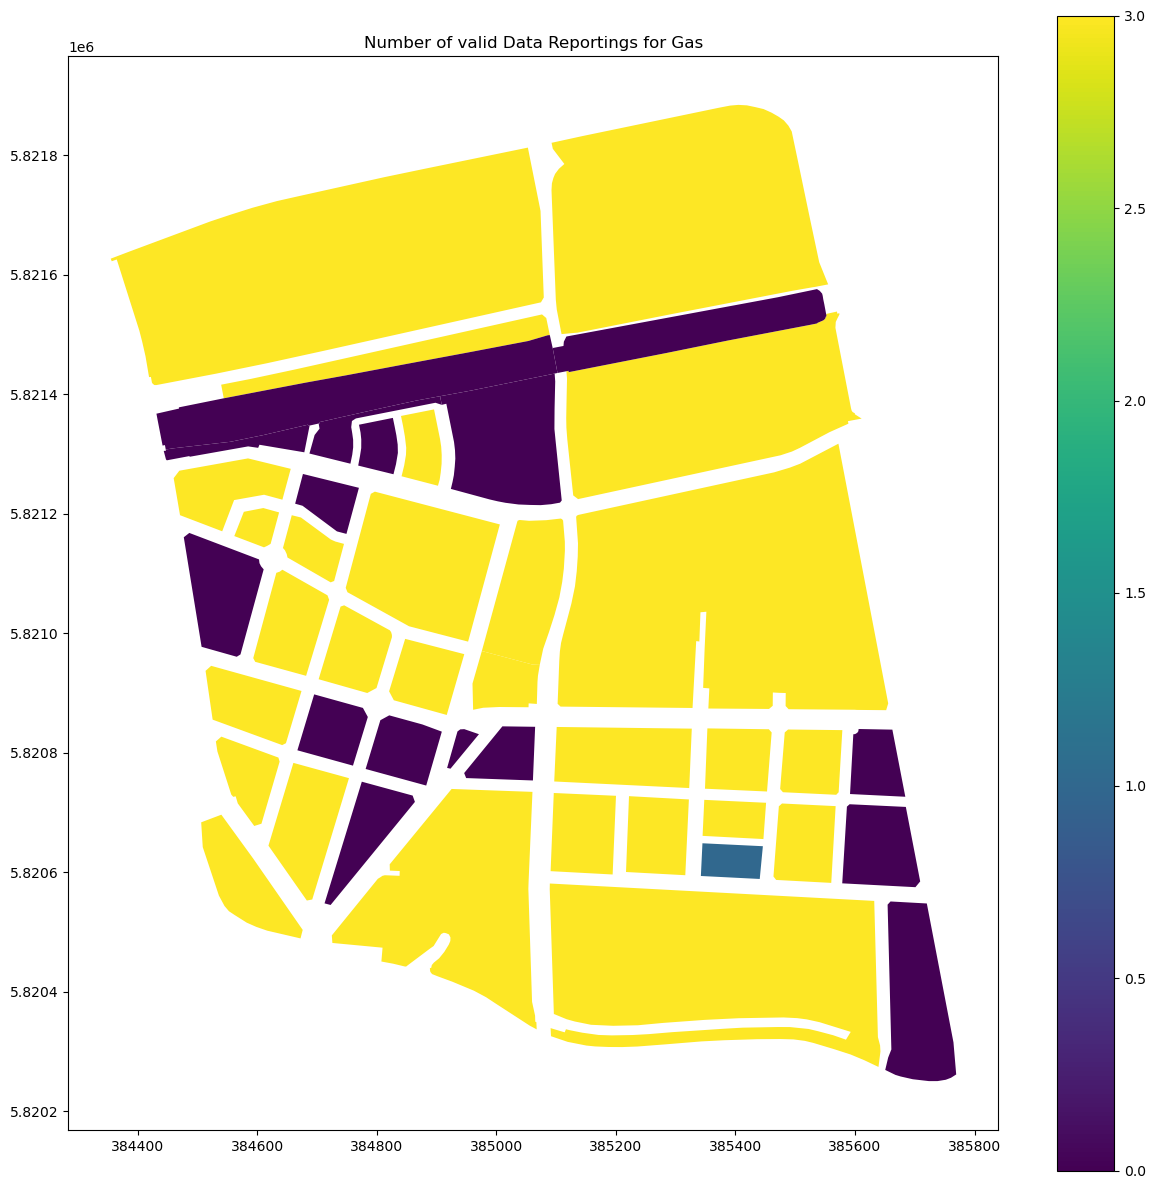

In [33]:

gas_columns_to_check = [
        "Gasverbrauch 2022 [MWh]",
        "Gasverbrauch 2021 [MWh]",
        "Gasverbrauch 2020 [MWh]"
    ]

for column in gas_columns_to_check:
        gas_data_shapes[column] = pd.to_numeric(gas_data_shapes[column], errors='coerce')

gas_data_shapes["valid_entries"] = gas_data_shapes[gas_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gas_data_shapes.plot(column='valid_entries', ax=ax, legend=True,)
plt.title('Number of valid Data Reportings for Gas')

In [54]:
# plot inhabitants and building age 

import os 
par_dir_path = os.path.dirname(os.getcwd()) 
shape_data_path = os.path.join(par_dir_path, 'data', 'berlin', '00_block_shape.shp')
inh_shapes = gpd.read_file(shape_data_path)
inh_shapes["blknr"] = inh_shapes["blknr"].astype('int64') 
for year in ["2020", "2021", "2022"]:
    file_path = os.path.join(par_dir_path, 'data', 'berlin', f"03_Inhabitants{year}.csv")
    df = pd.read_csv(file_path)
    reduced_df = df[["blknr", f"ew{year}"]]
    inh_shapes = inh_shapes.merge(reduced_df, on='blknr')
inh_shapes

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry,ew2020,ew2021,ew2022
0,19017,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,135480.859375,1999/07/12 00:00:00.000,"POLYGON ((385108.987 5821500.417, 385100.973 5...",0.0,0.0,0
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5...",6.0,9.0,9
2,19609,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,177086.625000,1998/10/08 00:00:00.000,"POLYGON ((384425.042 5821417.137, 384423.583 5...",0.0,0.0,0
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5...",0.0,0.0,0
4,19708,04,Charlottenburg-Wilmersdorf,04300518,Block,10-99 Einwohner,16879.630859,2006/03/10 00:00:00.000,"POLYGON ((384539.409 5821415.761, 384588.890 5...",19.0,0.0,21
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5...",0.0,3.0,3
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5...",6.0,9.0,9
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5...",0.0,0.0,0
8,19901,04,Charlottenburg-Wilmersdorf,04300518,Bahnblock,unbewohnt,25851.810547,1994/11/24 00:00:00.000,"POLYGON ((385545.981 5821564.498, 385546.964 5...",0.0,0.0,0
9,20020,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,4897.128906,1994/11/24 00:00:00.000,"POLYGON ((384687.399 5821347.350, 384678.549 5...",0.0,0.0,0


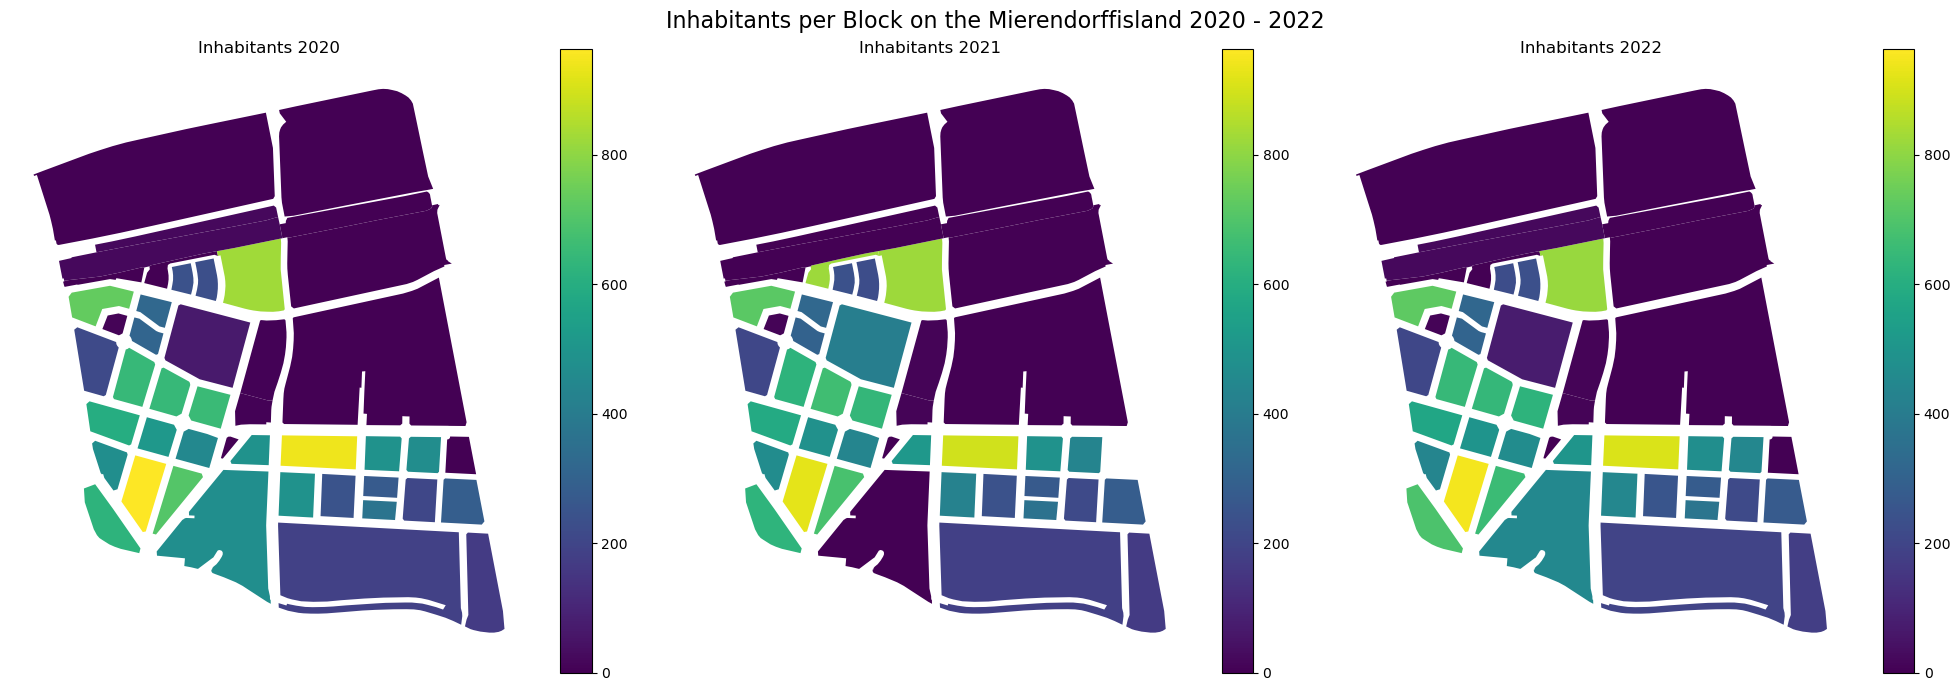

In [57]:
geo_data = inh_shapes

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns

# Define a normalization for the color mapping
norm = Normalize(vmin=geo_data[["ew2020",	"ew2021",	"ew2022"]].min().min(),
                 vmax=geo_data[["ew2020",	"ew2021",	"ew2022"]].max().max())

# Create the color map
cmap = plt.cm.viridis

# Plotting Stromverbrauch 2020
geo_data.plot(column='ew2020', ax=axs[0], legend=True, cmap=cmap, norm=norm)
axs[0].set_title('Inhabitants 2020')

# Plotting Stromverbrauch 2021
geo_data.plot(column='ew2021', ax=axs[1], legend=True, cmap=cmap, norm=norm)
axs[1].set_title('Inhabitants 2021')

# Plotting Stromverbrauch 2022
geo_data.plot(column='ew2022', ax=axs[2], legend=True, cmap=cmap, norm=norm)
axs[2].set_title('Inhabitants 2022')

# Remove the axis for a cleaner look and adjust for space between plots
for ax in axs:
    ax.axis('off')
plt.subplots_adjust(wspace=0.3)


# Add a common title
fig.suptitle('Inhabitants per Block on the Mierendorffisland 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the p

In [61]:
# plot Main Building Age vs average building age
import os 
par_dir_path = os.path.dirname(os.getcwd()) 
shape_data_path = os.path.join(par_dir_path, 'data', 'berlin', '00_block_shape.shp')
shapes = gpd.read_file(shape_data_path)
shapes["blknr"] = inh_shapes["blknr"].astype('int64') 
file_path_age = os.path.join(par_dir_path, 'data', 'berlin', '02_Gebäudealter.csv') 
age_df = pd.read_csv(file_path_age)
bldg_age_shapes =  shapes.merge(age_df, on='blknr') 

In [64]:
bldg_age_shapes.columns

Index(['blknr', 'bez_x', 'bezname_x', 'plr_x', 'blktypname_x', 'ewk_x',
       'area_x', 'datum_x', 'geometry', 'bez_y', 'bezname_y', 'plr_y',
       'blktypname_y', 'ewk_y', 'area_y', 'datum_y', 'ueberw_dek',
       'freistehen', 'doppelhaus', 'gereihtes', 'anderertyp', 'x_bis_1900',
       'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940', 'x1941_1950',
       'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990', 'x1991_2000',
       'x2001_2010', 'x2011_2015', 'ew2015', 'typ', 'typklar'],
      dtype='object')

Text(0.5, 1.0, 'Major building age group for residential buildings')

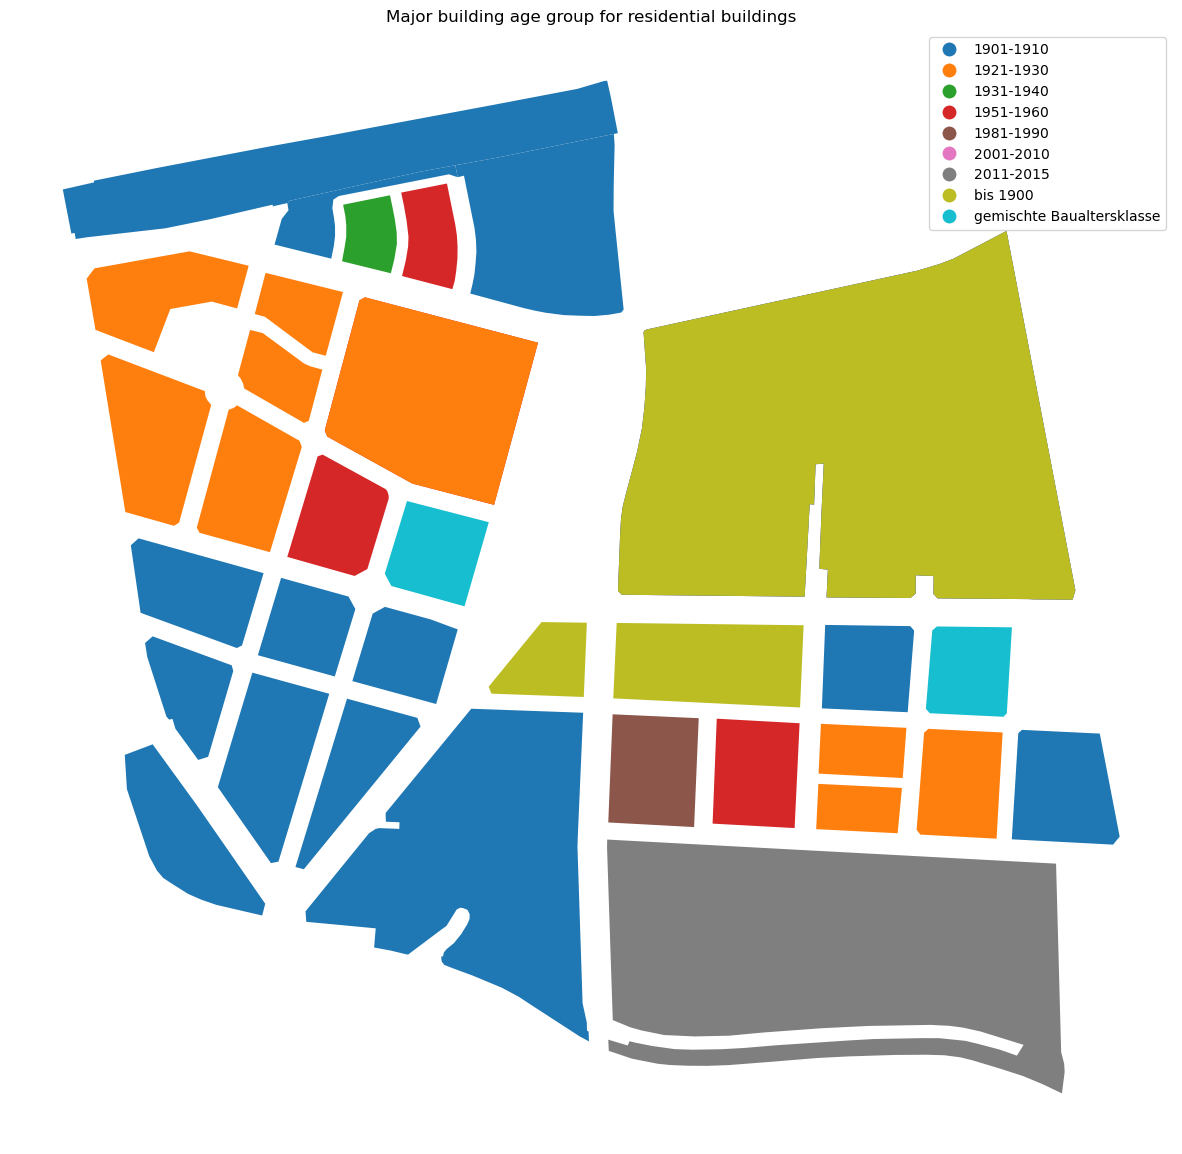

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
bldg_age_shapes.plot(column='ueberw_dek', ax=ax, legend=True,)
ax.axis('off')
plt.title('Major building age group for residential buildings')

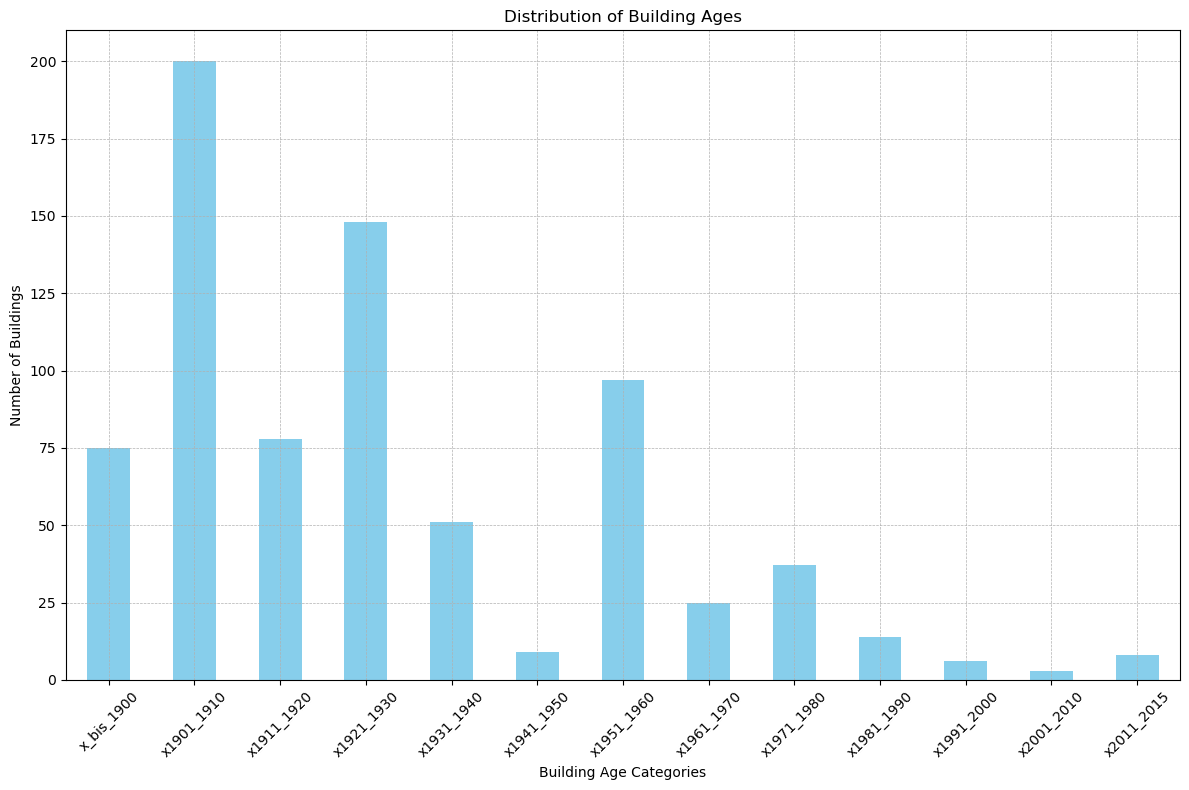

In [62]:
# Aggregate the total number of buildings in each age category
age_columns = [
    'x_bis_1900', 'x1901_1910', 'x1911_1920', 'x1921_1930', 'x1931_1940', 
    'x1941_1950', 'x1951_1960', 'x1961_1970', 'x1971_1980', 'x1981_1990', 
    'x1991_2000', 'x2001_2010', 'x2011_2015'
]
age_totals = bldg_age_shapes[age_columns].sum()

# Create a bar chart
plt.figure(figsize=(12, 8))
age_totals.plot(kind='bar', color='skyblue')
plt.title('Distribution of Building Ages')
plt.xlabel('Building Age Categories')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()